In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


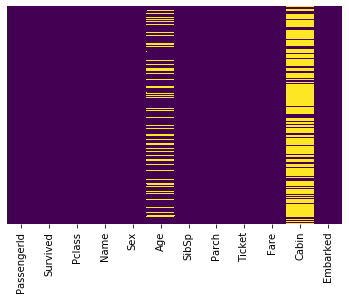

In [6]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

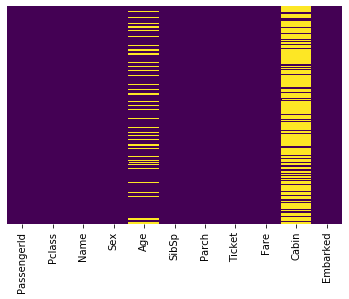

In [7]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [8]:
train_df = train_df.drop('Cabin', axis = 1)
test_df = test_df.drop('Cabin', axis = 1)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


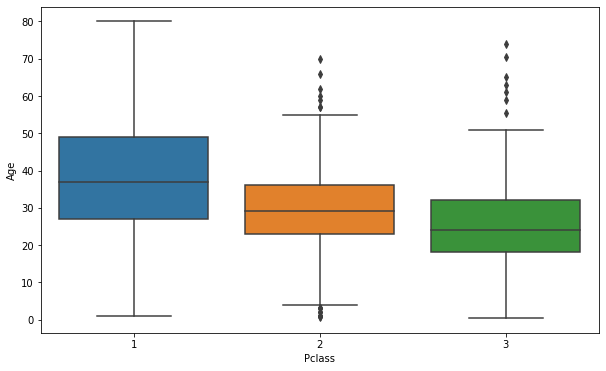

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'Pclass', y = "Age", data=train_df)

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [13]:
train_df['Age'] = train_df[["Age",'Pclass']].apply(impute_age, axis = 1)

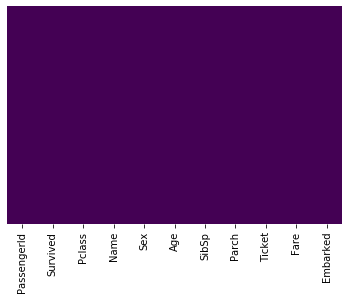

In [14]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

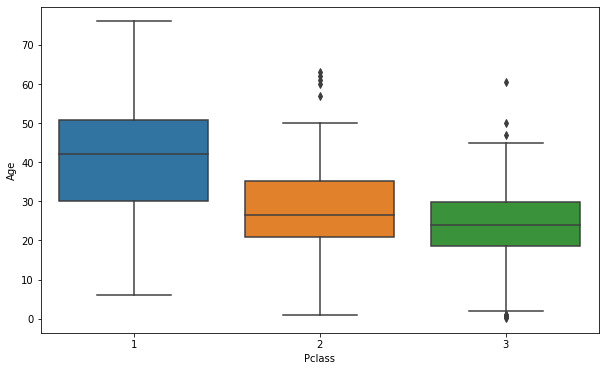

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'Pclass', y = "Age", data=test_df)

In [16]:
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 23

    else:
        return Age

In [17]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age1, axis = 1)

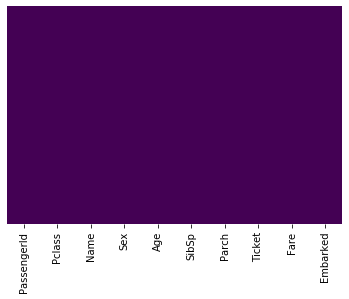

In [18]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [19]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
train_df["Embarked"].fillna('S',inplace = True)

In [21]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [23]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [24]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
new_train_df = pd.get_dummies(train_df, columns = ['Embarked', 'Sex', 'Pclass'], drop_first= True)

In [26]:
new_train_df.head(2)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0


In [27]:
new_test_df = pd.get_dummies(test_df, columns = ['Embarked', 'Sex', 'Pclass'], drop_first= True)

In [28]:
new_test_df.head(2)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,1,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,1,0,0,1


In [29]:
new_train_df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [30]:
new_train_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [31]:
new_train_df.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0


In [32]:
new_test_df.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [33]:
new_test_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [34]:
new_test_df.head(2)

,PassengerId,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,1,0,1,0,1
1,893,47.0,1,0,7.0000,0,1,0,0,1


In [35]:
new_train_df.shape

(891, 11)

In [36]:
y = new_train_df['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [37]:
new_train_df.drop('Survived', axis = 1, inplace = True)

In [38]:
new_train_df.head(2)

,PassengerId,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,0,1,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0


In [39]:
new_train_df.shape

(891, 10)

In [40]:
new_test_df.shape

(418, 10)

In [41]:
final_df = new_train_df.append(new_test_df)

In [42]:
final_df.head(3)

,PassengerId,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,0,1,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,1


In [43]:
final_df.shape

(1309, 10)

In [45]:
X = final_df.head(891).values

In [46]:
X.shape

(891, 10)

In [47]:
y.shape

(891,)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
my_model = LogisticRegression()

In [52]:
my_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction = my_model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       154
           1       0.83      0.61      0.70       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.79      0.78      0.77       268



In [56]:
print(confusion_matrix(y_test, prediction))

[[140  14]
 [ 45  69]]


In [57]:
Xf = final_df.tail(418).values

In [58]:
yf = my_model.predict(Xf)

In [59]:
yf.shape

(418,)

In [60]:
yf

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
submission = pd.DataFrame({"PassengerId": new_test_df["PassengerId"],"Survived": yf})

In [62]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
submission.to_csv('submission.csv', index=False)